## Predicting Car Prices

#### Name : Suryansh Srivastava
#### Id   : 124997

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [5]:
# loading data from Cars.csv
df=pd.read_csv('Cars.csv')

In [6]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [10]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
df['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [12]:
df['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

## Feature Engineering

In [13]:
# mapping the owners as per the instructions
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].map(owner_mapping)


In [14]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [15]:
# The rows with fuel type CNG and LPG were instructed to be dropped as they use different unit for mileage
toDrop=df[df['fuel'].isin(['CNG', 'LPG'])].index
df=df.drop(toDrop)

In [16]:
#  removing 'kmpl' after the numeric value in the mileage column and converting it to float , as instructed
df['mileage'] =df["mileage"].str.split(' ',expand=True)[0].astype(float)

In [17]:
#  removing 'CC' after the numeric value in the "engine" column and converting it to float , as instructed
df['engine'] = df['engine'].str.split(' ', expand=True)[0].astype(float)

In [18]:
df.engine

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8033, dtype: float64

In [19]:
# Removing string value (bph) from the max_power column and convert to float
df['max_power'] = df['max_power'].str.split(' ', expand=True)[0].astype(float)

In [20]:
# Keeping the first letter of the name and removing the rest, as instructed
df['name'] = df['name'].str.split(' ', 1).str[0]
df.rename(columns = {'name':'brand',}, inplace = True)

In [21]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [22]:
# dropping the feature torque as instructed
df = df.drop(columns=['torque'])

In [23]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [24]:
# Test Drive Cars are ridiculously expensive hence removing the rows as instructed
# Test Drive cars are being mapped to 5, therefore we remove the rows that have value 5 in their owner column
df=df[df['owner']!=5]

In [25]:
df['owner'].value_counts()

1    5238
2    2073
3     547
4     170
Name: owner, dtype: int64

## Exploratory Data Analysis (EDA)

<Axes: xlabel='transmission', ylabel='count'>

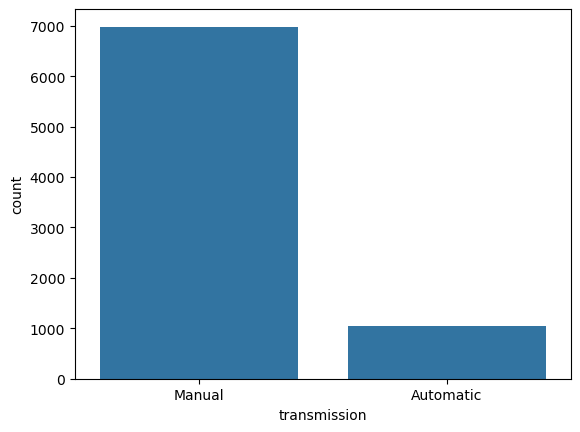

In [26]:
# count plot for transmission
sns.countplot(data=df, x='transmission')

<Axes: xlabel='fuel', ylabel='count'>

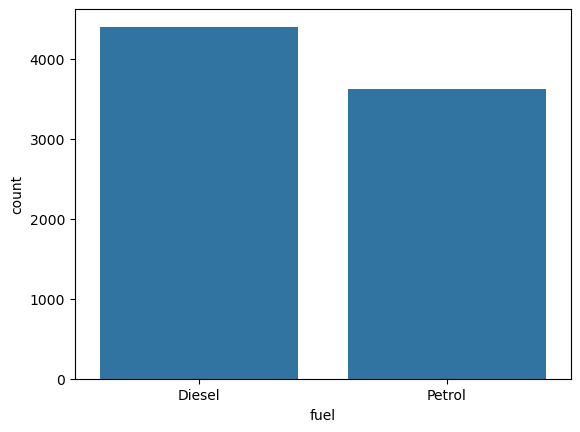

In [27]:
# count plot for the type of fuel used by the vehicles
sns.countplot(data=df, x='fuel')

<Axes: xlabel='owner', ylabel='count'>

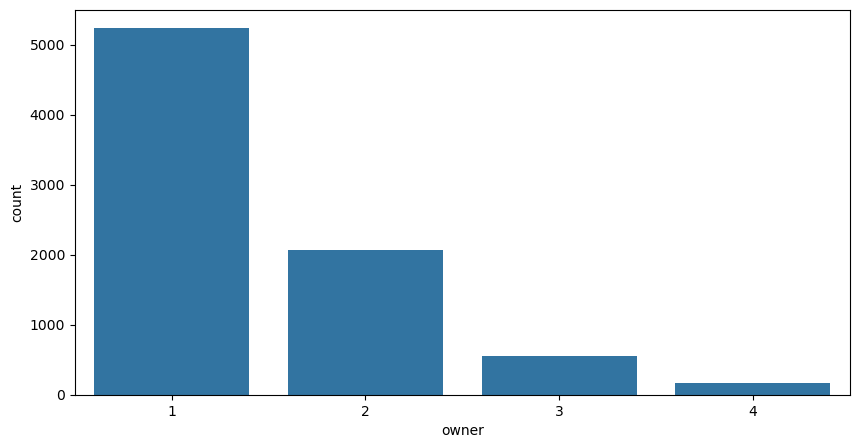

In [28]:
# count plot for the the type of ownership
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='owner')

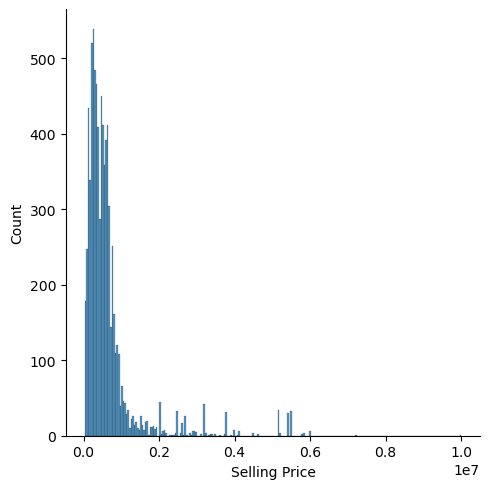

In [29]:
#  displot for the 'Selling_Price' column
sns.displot(data=df,x='selling_price')
plt.xlabel('Selling Price')
plt.show()

<Axes: xlabel='owner', ylabel='selling_price'>

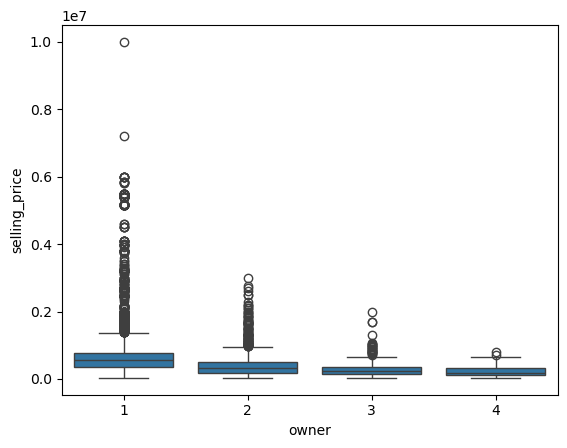

In [30]:
sns.boxplot(x=df['owner'],y=df['selling_price'])

<Axes: xlabel='fuel', ylabel='selling_price'>

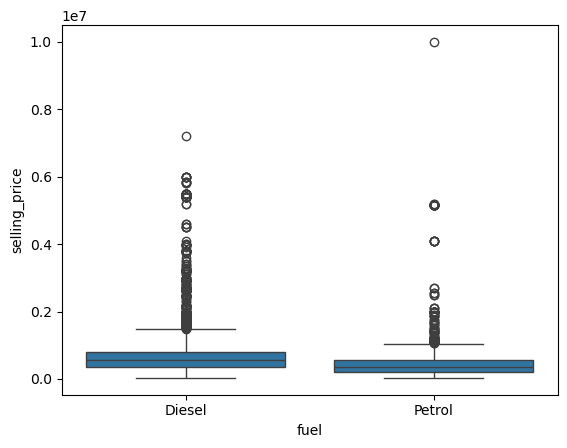

In [31]:
sns.boxplot(x=df['fuel'],y=df['selling_price'])

<Axes: xlabel='engine', ylabel='selling_price'>

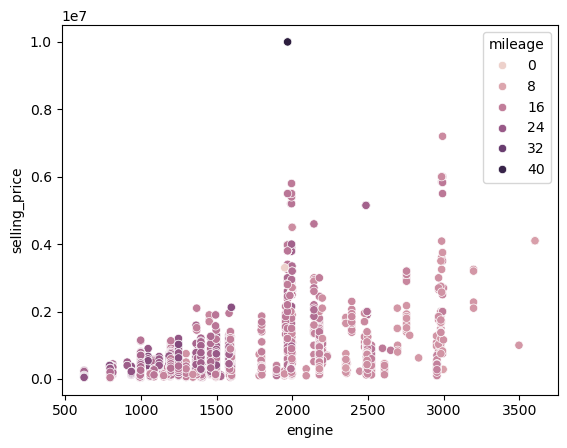

In [32]:
sns.scatterplot(x=df['engine'],y=df['selling_price'], hue=df['mileage'])

<Axes: xlabel='engine', ylabel='selling_price'>

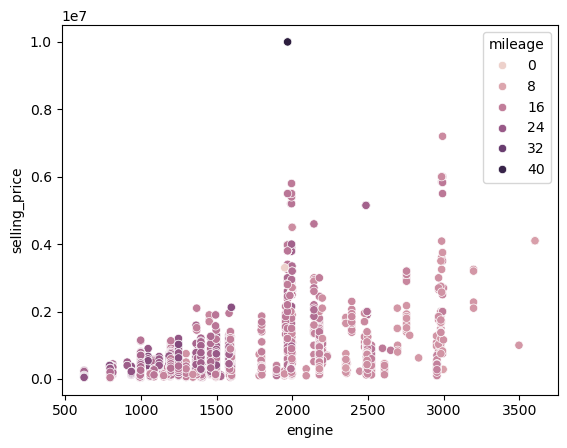

In [33]:
sns.scatterplot(x=df['engine'],y=df['selling_price'], hue=df['mileage'])

<Axes: >

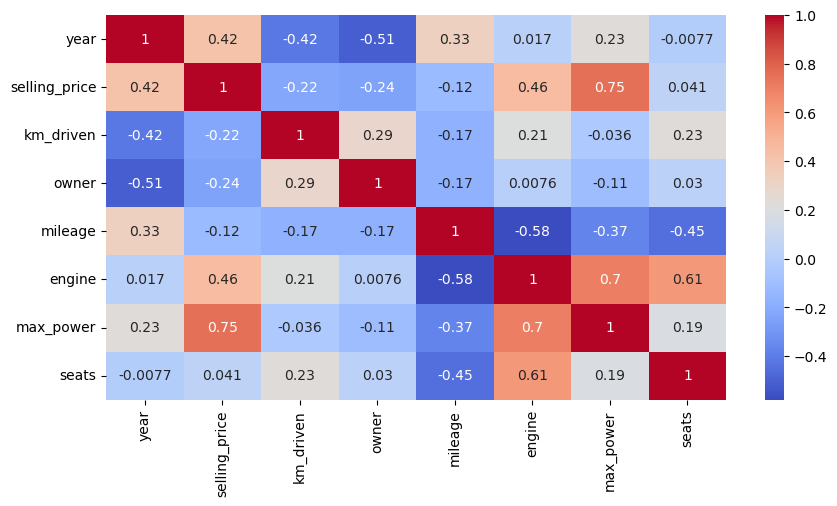

In [34]:
# Correlation matrix
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["transmission"]=le.fit_transform(df["transmission"])

<Axes: xlabel='x', ylabel='y'>

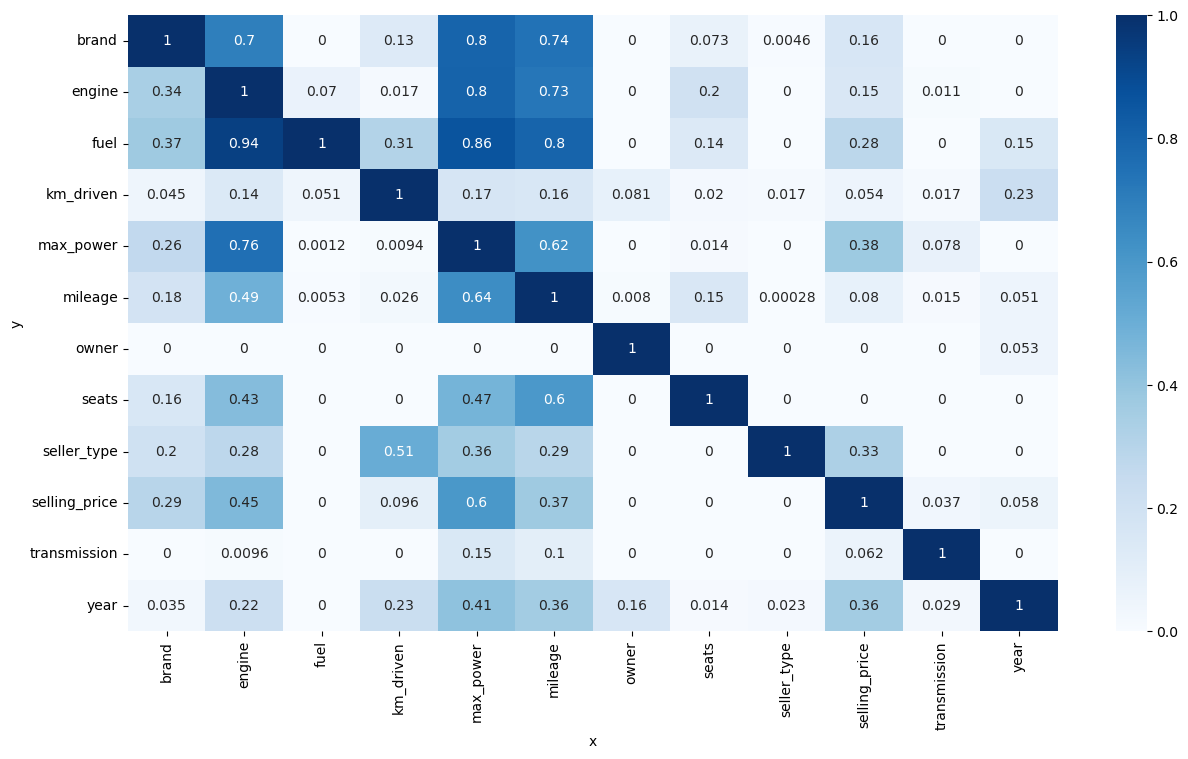

In [36]:
# predictive power score
import ppscore as pps

df_copy=df.copy()
df.drop(['brand','seats'],axis='columns', inplace=True)
matrix_df=pps.matrix(df_copy)[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')

plt.figure(figsize=(15,8))
sns.heatmap(matrix_df,vmin=0,vmax=1, cmap='Blues', annot=True)

## Feature Selection

In [37]:
X=df[[ 'km_driven', 'mileage', 'year']] 

# Apply log transformation to the target variable
# the large value of selling price can cause the predictions to be unstable, hence we use log transform 
y= np.log(df['selling_price']) 

In [38]:
X.shape, y.shape

((8028, 3), (8028,))

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=20)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5619, 3), (2409, 3), (5619,), (2409,))

## Data Preprocessing

In [41]:
# after loading the data, we observed that there were few null values

# checking for NA values in X_train
X_train.isna().sum()

km_driven      0
mileage      148
year           0
dtype: int64

In [42]:
# checking for NA values in X_test
X_test.isna().sum()

km_driven     0
mileage      66
year          0
dtype: int64

In [43]:
#  the displot for selling_price is not centered around the mean hence we are choosing to fill the values with the median
# X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
# X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [44]:
X_test.isna().sum(),X_train.isna().sum()

(km_driven    0
 mileage      0
 year         0
 dtype: int64,
 km_driven    0
 mileage      0
 year         0
 dtype: int64)

In [45]:
#now checking for NA values in y
y_train.isna().sum(), y_test.isna().sum()

##there are no NA values in both the training and test set for the label

(0, 0)

## Model Selection

In [46]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

algorithms=[LinearRegression(),SVR(),RandomForestRegressor(), KNeighborsRegressor(),DecisionTreeRegressor()]
algorithms_name=["LinearRegression",'SVR','RandomForestRegressor','KNeighborsRegressor','DecisionTreeRegressor']

In [47]:
# cross validation with selected to of 
from sklearn.model_selection import cross_val_score, KFold
train_mse=[]
test_mse=[]

# cross validation with kFold
kfold=KFold(n_splits=5,shuffle=True)
for i, model in enumerate(algorithms):
    scores=cross_val_score(model,X_train, y_train , cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithms_name[i]}: Score:{scores}; Mean:{scores.mean()}")

LinearRegression: Score:[-0.28151268 -0.31174031 -0.26240628 -0.29216974 -0.28450867]; Mean:-0.2864675361056534
SVR: Score:[-0.61782277 -0.57615246 -0.58478209 -0.59998341 -0.61063796]; Mean:-0.5978757365328445
RandomForestRegressor: Score:[-0.12029062 -0.12242874 -0.11800279 -0.12386571 -0.13579944]; Mean:-0.12407745861714004
KNeighborsRegressor: Score:[-0.28276079 -0.30845371 -0.32802744 -0.30298404 -0.31447886]; Mean:-0.3073409677120516
DecisionTreeRegressor: Score:[-0.19083588 -0.20123078 -0.2118729  -0.18504055 -0.17626377]; Mean:-0.19304877862884282


In [48]:
# here RandomForestRegressor is the best due to less mean squared error as compared to others

from sklearn.model_selection import GridSearchCV

#Gridsearch : It is just cross_validation but on one single model
param_grid={'bootstrap':[True],'max_depth':[5,12,None], 'n_estimators':[5,6,7,8,9,10]}

rf=RandomForestRegressor(random_state=1)
grid=GridSearchCV(estimator=rf,
                 param_grid=param_grid,
                 cv=kfold,
                 n_jobs=-1, 
                 return_train_score=True,
                 refit=True,
                 scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 12, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

## Testing

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
yhat=grid.predict(X_test)
mean_squared_error(y_test,yhat)

0.11797005894010994

In [50]:
r2_score(y_test,yhat)

0.8403579865120484

## Analysis

In [51]:
rf=grid.best_estimator_

In [52]:
rf.feature_importances_

array([0.08423523, 0.34312069, 0.57264408])

<BarContainer object of 3 artists>

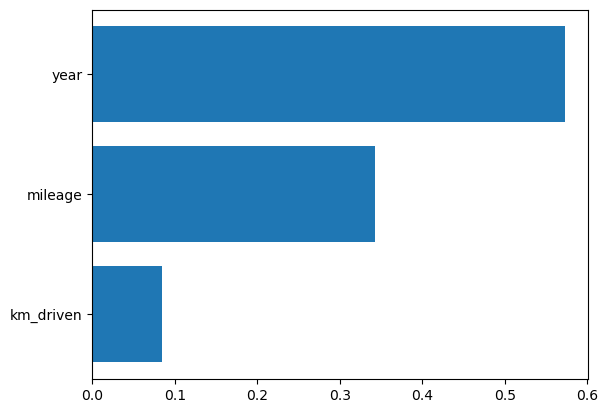

In [53]:
plt.barh(X.columns, rf.feature_importances_)

## Model

In [54]:
##  saving the model
import pickle
filename='car_price_predictor.pkl' #file extension doesn't matter
pickle.dump(grid,open(filename,'wb'))

In [55]:
## loading the model
loaded_model=pickle.load(open(filename,'rb'))

In [56]:
sample=df[['km_driven' ,'mileage','year']].loc[11]

In [57]:
sample

km_driven    100000.0
mileage          17.3
year           2005.0
Name: 11, dtype: float64

In [58]:
sample_np=np.array([[100000.0,17.3,2005.0]])
answer=loaded_model.predict(sample_np)

In [59]:
#  since we transformed the label using log transform, therefore we are transforming the predicted value back to normal state
predicted_answer= np.exp(answer)


In [60]:
predicted_answer

array([86211.60118306])

In [61]:
# listed answer
y=df[['selling_price']].loc[11]

In [62]:
y

selling_price    92000
Name: 11, dtype: int64

In [63]:
# comparing predicted values with the original selling price 
for i in range(10,35):
    sample=df[['km_driven','mileage','year']].loc[i]
    sample_np=np.array([[sample[0],sample[1],sample[2]]])
    answer=loaded_model.predict(sample_np)
    predicted_answer= np.exp(answer)
    y=df[['selling_price']].loc[i]
    print(f"{i} : P : {predicted_answer} , A : {y}")

10 : P : [417602.5614383] , A : selling_price    500000
Name: 10, dtype: int64
11 : P : [86211.60118306] , A : selling_price    92000
Name: 11, dtype: int64
12 : P : [193460.33077609] , A : selling_price    280000
Name: 12, dtype: int64
13 : P : [122108.88668034] , A : selling_price    200000
Name: 13, dtype: int64
14 : P : [173012.5654118] , A : selling_price    180000
Name: 14, dtype: int64
15 : P : [393779.25366715] , A : selling_price    400000
Name: 15, dtype: int64
16 : P : [697288.81659623] , A : selling_price    778000
Name: 16, dtype: int64
17 : P : [407298.66887569] , A : selling_price    500000
Name: 17, dtype: int64
18 : P : [134122.53125719] , A : selling_price    150000
Name: 18, dtype: int64
19 : P : [621520.79020441] , A : selling_price    680000
Name: 19, dtype: int64
20 : P : [215179.06140277] , A : selling_price    174000
Name: 20, dtype: int64
21 : P : [835503.90831638] , A : selling_price    950000
Name: 21, dtype: int64
22 : P : [533065.34532666] , A : selling_pri

In [65]:
# for any imputation in the web app
df['year'].median(),df['mileage'].median(),df['km_driven'].median()

(2015.0, 19.3, 60000.0)

# Report

After the analysis of the dataset, it is observed that the features which influences car's performance like engine size, mileage, kms driven and type of fuel. There are other factors like brand name, year of manufacturing etc. that also hold a say in the price of the car.

Here the features taken into account are 'mileage', 'year', and 'km_driven' to predict the selling price of the car.
A car's mileage reflects its fuel efficiency, a consideration, for buyers of operating expenses. Typically higher mileage suggests fuel economy, a sought after quality, in a vehicle. Nonetheless high mileage may signify wear and tear potentially impacting the cars resale value.
The age of a car plays a role, in determining its value, advancements and how long it is expected to last. Typically newer vehicles come with a price tag as they offer modern features, improved safety measures and are less likely to need major repairs. On the contrary older cars tend to decrease in value over time. This factor is vital when assessing the market worth of a vehicle since newer models generally hold their value better than old ones.
Kilometers driven also plays a major role in deciding a car's value, generally the cars that have be driven less tends to hold more price due to less mechanical wear and tear. 

However torque didn't provide useful information and were excluded from the analysis. The choice to eliminate this feature was based on its complexity and the company's limited knowledge of how it influenced car prices. 

Among the algorithms LinearRegression, SVR, RandomForestRegressor, KNeighborsRegressor and DecisionTreeRegressor, RandomForestRegressor  performed well.

On testing the model on the test set, the mean squared error is 0.11468 and the r-squared score is 0.84480
Mean Squared Error(MSE) measures the average of the squared differences between the predicted values and the actual values. A lower MSE indicates a better performing model.

The R² score is a useful metric for evaluating the goodness of fit of a regression model, helping to understand how well a model explains the variability in the data. Here it's value is 0.84480 i.e. 84.45% of the target variable can be explained by the model based on the provided features and the rest 15.55% variance is due to the factors not captured by the model.